---
title: 'Introduction to R: Fundamentals, Visualization and Data Manipulation'
author: "Ali Zaidi, Machine Learning and Data Science Education Team"
date: "June 6th, 2016"
output:
  ioslides_presentation:
    logo: images/clark-logo.png
    runtime: shiny
    smaller: yes
    widescreen: yes
  html_notebook:
    toc: yes
  html_document:
    toc: yes
    keep_md: true
params: 
  prestype:
    label: "Presentation Type:"
    value: interactive
    input: select

# Lab 1: R Data Types

# Data Manipulation with the dplyr Package

## Overview

Rather than describing the nitty gritty details of writing R code, I'd like you to get started at immediately writing R code.

As most of you are data scientists/data enthusiasts, I will showcase one of the most useful data manipulation packages in R, `dplyr`.
At the end of this session, you will have learned:

* How to manipulate data quickly with `dplyr` using a very intuitive 'grammar'
* How to use `dplyr` to perform common exploratory and manipulation procedures
* How to apply your own custom functions to group manipulations `dplyr` with `mutate()`, `summarise()` and `do()`
* Connect to remote databases to work with larger than memory datasets

## Why use dplyr? 
### The Grammar of Data Manipulation

* R comes with a plethora of base functions for data manipulation, so why use `dplyr`?
* `dplyr` makes data manipulation easier by providing a few functions for the most common tasks and procedures
* `dplyr` achieves remarkable speed-up gains by using a C++ backend
* `dplyr` has multiple backends for working with data stored in various sources: SQLite, MySQL, bigquery, SQL Server, and many more
* `dplyr` was inspired to give data manipulation a simple, cohesive grammar (similar philosophy to `ggplot` - grammar of graphics)
* `dplyr` has inspired many new packages, which now adopt it's easy to understand syntax. 
* The recent package `dplyrXdf` brings much of the same functionality of `dplyr` to `XDF` data, and `SparkR`, `SparkRext` and finally, `sparklyr` provides the same for manipulating Spark `DataFrames`


## Tidy Data and Happier Coding
### Premature Optimization 

![](https://imgs.xkcd.com/comics/the_general_problem.png)

+ The most important parameter to optimize in a data science development cycle is YOUR time
+ It is therefore important to be able to write efficient code, quickly
+ The code should be easy to understand, debug, port, and deploy
+ Goals: writing fast code that is: portable, platform invariant, easy to understand, and easy to debug
    - __I'm serious about CReUse__!

## Manipulation verbs

`filter`

:    select rows based on matching criteria

`slice`

:    select rows by number

`select`

:    select columns by column names

`arrange`

:    reorder rows by column values

`mutate`

:    add new variables based on transformations of existing variables

`transmute`

:    transform and drop other variables



## Aggregation verbs

`group_by`

:    identify grouping variables for calculating groupwise summary statistics


`count`

:    count the number of records per group


`summarise` | `summarize`

:    calculate one or more summary functions per group, returning one row of results per group (or one for the entire dataset)

## Viewing Data

* `dplyr` includes a wrapper called `tbl_df` makes df into a 'local df' that improves the printing of dataframes in the console (there's now a dedicated package [`tibble`](www.github.com/hadley/tibble) for this wrapper)
* if you want to see more of the data you can still coerce to `data.frame`

In [1]:
list.of.packages <- c("broom","dplyr","ggplot2","stringr")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages)


In [5]:
library(dplyr)
library(stringr)
# taxi_df <- as.data.frame(data.table::fread('../data/sample_taxi.csv'))
load(url("https://alizaidi.blob.core.windows.net/training/taxi_df.RData"))
print(taxi_df <- tbl_df(taxi_df))

Source: local data frame [3,770,319 x 16]

   VendorID passenger_count trip_distance RateCodeID store_and_fwd_flag
      (chr)           (int)         (dbl)      (chr)              (chr)
1         1               1          1.80          1                  N
2         1               2          0.90          1                  N
3         1               1          0.90          1                  N
4         1               1          0.30          1                  N
5         2               1          0.96          1                  N
6         2               1          2.01          1                  N
7         2               3          3.14          1                  N
8         1               1          0.50          1                  N
9         2               1          0.67          1                  N
10        2               1         15.20          2                  N
..      ...             ...           ...        ...                ...
Variables not shown: 

# Filtering and Reordering Data

## Subsetting Data

* `dplyr` makes subsetting by rows very easy
* The `filter` verb takes conditions for filtering rows based on conditions
* **every** `dplyr` function uses a data.frame/tbl as it's first argument
* Additional conditions are passed as new arguments (no need to make an insanely complicated expression, split em up!)

In [6]:
print(filter(taxi_df,
       dropoff_dow %in% c("Fri", "Sat", "Sun"),
       tip_amount > 1))

Source: local data frame [859,165 x 16]

   VendorID passenger_count trip_distance RateCodeID store_and_fwd_flag
      (chr)           (int)         (dbl)      (chr)              (chr)
1         1               2          0.90          1                  N
2         1               1          0.90          1                  N
3         2               1          2.01          1                  N
4         2               3          3.14          1                  N
5         2               1          6.08          1                  N
6         2               1          1.96          1                  N
7         1               1          0.40          1                  N
8         1               2          1.70          1                  N
9         1               2          0.60          1                  N
10        1               2          9.30          1                  N
..      ...             ...           ...        ...                ...
Variables not shown: pa

## Exercise

Your turn: 

* How many observations started in Harlem?
  - pick both sides of Harlem, including east harlem
* How many observations that started in Harlem ended in the Financial District?

## Solution

In [7]:
library(stringr)
harlem_pickups <- filter(taxi_df, str_detect(pickup_nhood, "Harlem"))
print(harlem_pickups)

Source: local data frame [32,025 x 16]

   VendorID passenger_count trip_distance RateCodeID store_and_fwd_flag
      (chr)           (int)         (dbl)      (chr)              (chr)
1         1               1          0.70          1                  N
2         1               1          1.10          1                  N
3         2               1         18.79          2                  N
4         2               1          4.66          1                  N
5         2               5          0.67          1                  N
6         2               3          0.76          1                  N
7         1               1          2.70          1                  N
8         2               1          3.19          1                  N
9         2               1          0.85          1                  N
10        2               2          6.06          1                  N
..      ...             ...           ...        ...                ...
Variables not shown: pay

## Select a set of columns

* You can use the `select()` verb to specify which columns of a dataset you want
* This is similar to the `keep` option in SAS's data step.
* Use a colon `:` to select all the columns between two variables (inclusive)
* Use `contains` to take any columns containing a certain word/phrase/character

## Select Example

In [8]:
print(select(taxi_df, pickup_nhood, dropoff_nhood, fare_amount, dropoff_hour, trip_distance))

Source: local data frame [3,770,319 x 5]

          pickup_nhood      dropoff_nhood fare_amount dropoff_hour
                 (chr)              (chr)       (dbl)        (chr)
1  Morningside Heights   Hamilton Heights         9.5         6-10
2              Midtown            Midtown         6.5         6-10
3      Lower East Side               Soho         7.0         6-10
4   Financial District Financial District         3.0         6-10
5              Chelsea       West Village         5.5         6-10
6      Upper East Side             Harlem         9.5         10-5
7           Fort Green               Soho        12.5         12-4
8      Upper East Side    Upper East Side         4.0         12-4
9      Upper West Side    Upper West Side         5.0         12-4
10                  NA            Clinton        52.0         12-4
..                 ...                ...         ...          ...
Variables not shown: trip_distance (dbl)


## Select: Other Options

starts_with(x, ignore.case = FALSE)

:    name starts with `x`

ends_with(x, ignore.case = FALSE)

:    name ends with `x`

matches(x, ignore.case = FALSE)

:    selects all variables whose name matches the regular expression `x`

num_range("V", 1:5, width = 1)

:    selects all variables (numerically) from `V1` to `V5`.

You can also use a `-` to drop variables.

## Reordering Data

* You can reorder your dataset based on conditions using the `arrange()` verb
* Use the `desc` function to sort in descending order rather than ascending order (default)

In [9]:
print(select(arrange(taxi_df, desc(fare_amount), pickup_nhood), fare_amount, pickup_nhood))

Source: local data frame [3,770,319 x 2]

   fare_amount    pickup_nhood
         (dbl)           (chr)
1      3130.30    Borough Park
2      3130.30 Upper West Side
3       990.00              NA
4       900.00    Little Italy
5       900.00              NA
6       630.01         Chelsea
7       600.00    Throggs Neck
8       500.00       Chinatown
9       500.00       Chinatown
10      500.00         Clinton
..         ...             ...


## Exercise
Use `arrange()` to  sort on the basis of `tip_amount`, `dropoff_nhood`, and `pickup_dow`, with descending order for tip amount

## Solution

## Summary

filter

:    Extract subsets of rows. See also `slice()`

select

:    Extract subsets of columns. See also `rename()`

arrange

:    Sort your data

# Data Aggregations and Transformations

## Transformations

* The `mutate()` verb can be used to make new columns

In [10]:
taxi_df <- mutate(taxi_df, tip_pct = tip_amount/fare_amount)
print(select(taxi_df, tip_pct, fare_amount, tip_amount))

Source: local data frame [3,770,319 x 3]

     tip_pct fare_amount tip_amount
       (dbl)       (dbl)      (dbl)
1  0.0000000         9.5       0.00
2  0.2384615         6.5       1.55
3  0.2371429         7.0       1.66
4  0.0000000         3.0       0.00
5  0.2363636         5.5       1.30
6  0.2273684         9.5       2.16
7  0.2000000        12.5       2.50
8  0.2500000         4.0       1.00
9  0.2000000         5.0       1.00
10 0.2755769        52.0      14.33
..       ...         ...        ...


## Summarise Data by Groups

* The `group_by` verb creates a grouping by a categorical variable
* Functions can be placed inside `summarise` to create summary functions

In [11]:
print(summarise(group_by(taxi_df, dropoff_nhood), Num = n(), ave_tip_pct = mean(tip_pct)))

Source: local data frame [122 x 3]

              dropoff_nhood   Num ave_tip_pct
                      (chr) (int)       (dbl)
1                 Annandale    16  0.16486695
2             Ardon Heights    16  0.15149972
3  Astoria-Long Island City 34728  0.11710247
4                Auburndale   424  0.09363095
5              Battery Park 32618  0.14849849
6                 Bay Ridge  3171  0.14507851
7                Baychester   168  0.06078747
8        Bedford-Stuyvesant 17382  0.12722678
9              Bedford Park  1028  0.08187483
10              Bensonhurst  1081  0.12771086
..                      ...   ...         ...


## Group By Neighborhoods Example

In [12]:
print(summarise(group_by(taxi_df, pickup_nhood, dropoff_nhood), Num = n(), ave_tip_pct = mean(tip_pct)))

Source: local data frame [5,224 x 4]
Groups: pickup_nhood [?]

               pickup_nhood            dropoff_nhood   Num ave_tip_pct
                      (chr)                    (chr) (int)       (dbl)
1             Ardon Heights            Ardon Heights     1  0.00000000
2  Astoria-Long Island City Astoria-Long Island City  6714  0.09712743
3  Astoria-Long Island City               Auburndale    13  0.06520367
4  Astoria-Long Island City             Battery Park    14  0.10140865
5  Astoria-Long Island City                Bay Ridge     5  0.15388657
6  Astoria-Long Island City       Bedford-Stuyvesant    68  0.09819024
7  Astoria-Long Island City             Bedford Park     3  0.05550679
8  Astoria-Long Island City              Bensonhurst     2  0.00000000
9  Astoria-Long Island City              Boerum Hill    12  0.09941085
10 Astoria-Long Island City             Borough Park     9  0.08205749
..                      ...                      ...   ...         ...


## Chaining/Piping

* A `dplyr` installation includes the `magrittr` package as a dependency 
* The `magrittr` package includes a pipe operator that allows you to pass the current dataset to another function
* This makes interpreting a nested sequence of operations much easier to understand

## Standard Code

* Code is executed inside-out.
* Let's arrange the above average tips in descending order, and only look at the locations that had at least 10 dropoffs and pickups.

In [13]:
filter(arrange(summarise(group_by(taxi_df, pickup_nhood, dropoff_nhood), Num = n(), ave_tip_pct = mean(tip_pct)), desc(ave_tip_pct)), Num >= 10)

,pickup_nhood,dropoff_nhood,Num,ave_tip_pct
1,Astoria-Long Island City,Carroll Gardens,19,0.153588261136031
2,Astoria-Long Island City,East Village,171,0.143118548207709
3,Astoria-Long Island City,Downtown,22,0.133530903723109
4,Astoria-Long Island City,Financial District,117,0.132408676626068
5,Astoria-Long Island City,Morningside Heights,32,0.129766573181761
6,Astoria-Long Island City,Soho,58,0.129501289148457
7,Astoria-Long Island City,Greenwich Village,146,0.12778519776767
8,Astoria-Long Island City,Central Park,72,0.127555754598017
9,Astoria-Long Island City,Fort Green,62,0.122389249656247
10,Astoria-Long Island City,Park Slope,25,0.121939736056366


## Reformatted

In [14]:
filter(
  arrange(
    summarise(
      group_by(taxi_df, 
               pickup_nhood, dropoff_nhood), 
      Num = n(), 
      ave_tip_pct = mean(tip_pct)), 
    desc(ave_tip_pct)), 
  Num >= 10)

,pickup_nhood,dropoff_nhood,Num,ave_tip_pct
1,Astoria-Long Island City,Carroll Gardens,19,0.153588261136031
2,Astoria-Long Island City,East Village,171,0.143118548207709
3,Astoria-Long Island City,Downtown,22,0.133530903723109
4,Astoria-Long Island City,Financial District,117,0.132408676626068
5,Astoria-Long Island City,Morningside Heights,32,0.129766573181761
6,Astoria-Long Island City,Soho,58,0.129501289148457
7,Astoria-Long Island City,Greenwich Village,146,0.12778519776767
8,Astoria-Long Island City,Central Park,72,0.127555754598017
9,Astoria-Long Island City,Fort Green,62,0.122389249656247
10,Astoria-Long Island City,Park Slope,25,0.121939736056366


## Magrittr

![](https://github.com/smbache/magrittr/raw/master/inst/logo.png)

* Inspired by unix `|`, and F# forward pipe `|>`, `magrittr` introduces the funny character (`%>%`, the _then_ operator)
* `%>%` pipes the object on the left hand side to the first argument of the function on the right hand side
* Every function in `dplyr` has a slot for `data.frame/tbl` as it's first argument, so this works beautifully!

In [15]:
taxi_df %>% 
  group_by(pickup_nhood, dropoff_nhood) %>% 
  summarize(Num = n(),
            ave_tip_pct = mean(tip_pct)) %>% 
  arrange(desc(ave_tip_pct)) %>% 
  filter(Num >= 10) %>% print

Source: local data frame [2,620 x 4]
Groups: pickup_nhood [86]

               pickup_nhood       dropoff_nhood   Num ave_tip_pct
                      (chr)               (chr) (int)       (dbl)
1  Astoria-Long Island City     Carroll Gardens    19   0.1535883
2  Astoria-Long Island City        East Village   171   0.1431185
3  Astoria-Long Island City            Downtown    22   0.1335309
4  Astoria-Long Island City  Financial District   117   0.1324087
5  Astoria-Long Island City Morningside Heights    32   0.1297666
6  Astoria-Long Island City                Soho    58   0.1295013
7  Astoria-Long Island City   Greenwich Village   146   0.1277852
8  Astoria-Long Island City        Central Park    72   0.1275558
9  Astoria-Long Island City          Fort Green    62   0.1223892
10 Astoria-Long Island City          Park Slope    25   0.1219397
..                      ...                 ...   ...         ...


## Pipe + group_by()

* The pipe operator is very helpful for group by summaries
* Let's calculate average tip amount, and average trip distance, controlling for dropoff day of the week and dropoff location
* First filter with the vector `manhattan_hoods`

In [11]:
load(url("https://alizaidi.blob.core.windows.net/training/manhattan.RData"))
taxi_df %>% 
  filter(pickup_nhood %in% manhattan_hoods,
         dropoff_nhood %in% manhattan_hoods) %>% 
  group_by(dropoff_nhood, pickup_nhood) %>% 
  summarize(ave_tip = mean(tip_pct), 
            ave_dist = mean(trip_distance)) %>% 
  filter(ave_dist > 3, ave_tip > 0.05) %>% print


Source: local data frame [398 x 4]
Groups: dropoff_nhood [27]

   dropoff_nhood     pickup_nhood    ave_tip  ave_dist
           (chr)            (chr)      (dbl)     (dbl)
1   Battery Park     Central Park 0.12694563  6.149281
2   Battery Park          Clinton 0.11996579  4.016902
3   Battery Park      East Harlem 0.07116177 10.124000
4   Battery Park     East Village 0.14717019  3.537367
5   Battery Park Garment District 0.13463903  3.965532
6   Battery Park         Gramercy 0.14396885  4.153174
7   Battery Park Hamilton Heights 0.06770436  8.843571
8   Battery Park           Harlem 0.13829591  9.039286
9   Battery Park           Inwood 0.18235294 11.950000
10  Battery Park          Midtown 0.13428280  5.496734
..           ...              ...        ...       ...


## Pipe and Plot

Piping is not limited to dplyr functions, can be used everywhere!

Warning message:
: package 'ggplot2' was built under R version 3.2.5

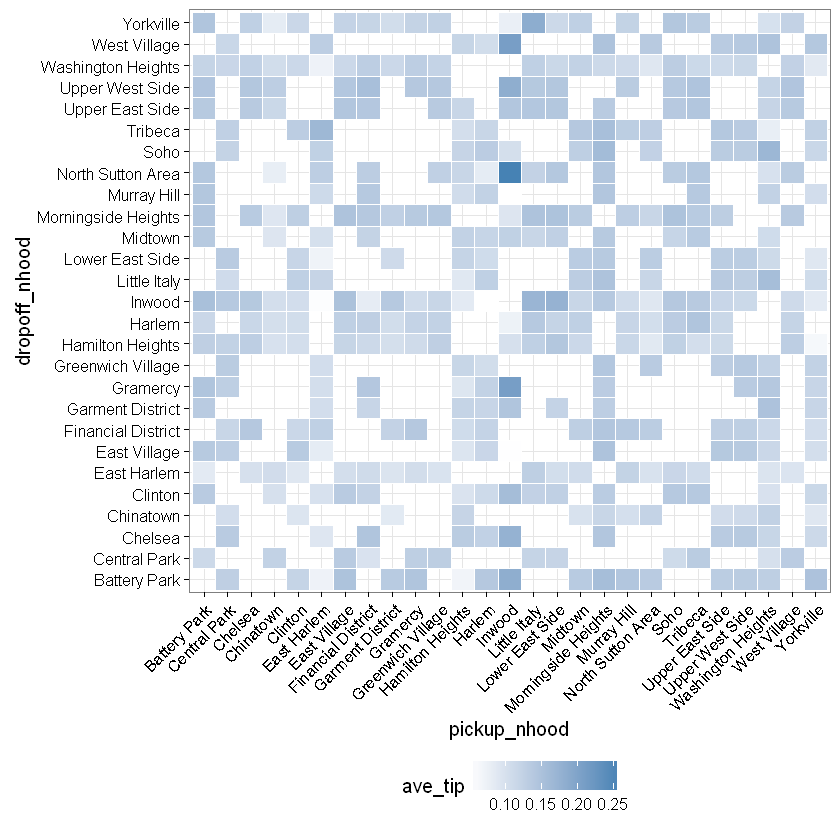

In [17]:
library(ggplot2)
taxi_df %>% 
  filter(pickup_nhood %in% manhattan_hoods,
         dropoff_nhood %in% manhattan_hoods) %>% 
  group_by(dropoff_nhood, pickup_nhood) %>% 
  summarize(ave_tip = mean(tip_pct), 
            ave_dist = mean(trip_distance)) %>% 
  filter(ave_dist > 3, ave_tip > 0.05) %>% 
  ggplot(aes(x = pickup_nhood, y = dropoff_nhood)) + 
    geom_tile(aes(fill = ave_tip), colour = "white") + 
    theme_bw() + 
    theme(axis.text.x = element_text(angle = 45, hjust = 1),
          legend.position = 'bottom') +
    scale_fill_gradient(low = "white", high = "steelblue")



## Piping to other arguments

* Although `dplyr` takes great care to make it particularly amenable to piping, other functions may not reserve the first argument to the object you are passing into it.
* You can use the special `.` placeholder to specify where the object should enter

In [18]:
taxi_df %>% 
  filter(pickup_nhood %in% manhattan_hoods,
         dropoff_nhood %in% manhattan_hoods) %>% 
  group_by(dropoff_nhood, pickup_nhood) %>% 
  summarize(ave_tip = mean(tip_pct), 
            ave_dist = mean(trip_distance)) %>% 
  lm(ave_tip ~ ave_dist, data = .) -> taxi_model
summary(taxi_model)



Call:
lm(formula = ave_tip ~ ave_dist, data = .)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.112258 -0.010882  0.002727  0.014168  0.140976 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.1324307  0.0016071  82.402  < 2e-16 ***
ave_dist    -0.0017345  0.0003004  -5.773 1.15e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02468 on 724 degrees of freedom
Multiple R-squared:  0.04401,	Adjusted R-squared:  0.04269 
F-statistic: 33.33 on 1 and 724 DF,  p-value: 1.153e-08


## Exercise
  
Your turn: 

* Use the pipe operator to group by day of week and dropoff neighborhood
* Filter to Manhattan neighborhoods 
* Make tile plot with average fare amount in dollars as the fill

## Solution

# Functional Programming

## Creating Functional Pipelines 
### Reusable code

* The examples above create a rather messy pipeline operation
* Can be very hard to debug

* The operation is pretty readable, but lacks reusability
* Since R is a functional language, we benefit by splitting these operations into functions and calling them separately
* This allows resuability; don't write the same code twice!

## Functional Pipelines 
### Summarization

* Let's create a function that takes an argument for the data, and applies the summarization by neighborhood to calculate average tip and trip distance

In [22]:
taxi_hood_sum <- function(taxi_data = taxi_df) {
  
  load(url("https://alizaidi.blob.core.windows.net/training/manhattan.RData"))
  taxi_data %>% 
    filter(pickup_nhood %in% manhattan_hoods,
           dropoff_nhood %in% manhattan_hoods) %>% 
    group_by(dropoff_nhood, pickup_nhood) %>% 
    summarize(ave_tip = mean(tip_pct), 
              ave_dist = mean(trip_distance)) %>% 
    filter(ave_dist > 3, ave_tip > 0.05) -> sum_df
  
  return(sum_df)
  
}



## Functional Pipelines | Plotting Function

* We can create a second function for the plot

In [21]:
tile_plot_hood <- function(df = taxi_hood_sum()) {
  
  library(ggplot2)
  
  ggplot(data = df, aes(x = pickup_nhood, y = dropoff_nhood)) + 
    geom_tile(aes(fill = ave_tip), colour = "white") + 
    theme_bw() + 
    theme(axis.text.x = element_text(angle = 45, hjust = 1),
          legend.position = 'bottom') +
    scale_fill_gradient(low = "white", high = "steelblue") -> gplot
  
  return(gplot)
}



## Calling Our Pipeline

* Now we can create our plot by simply calling our two functions

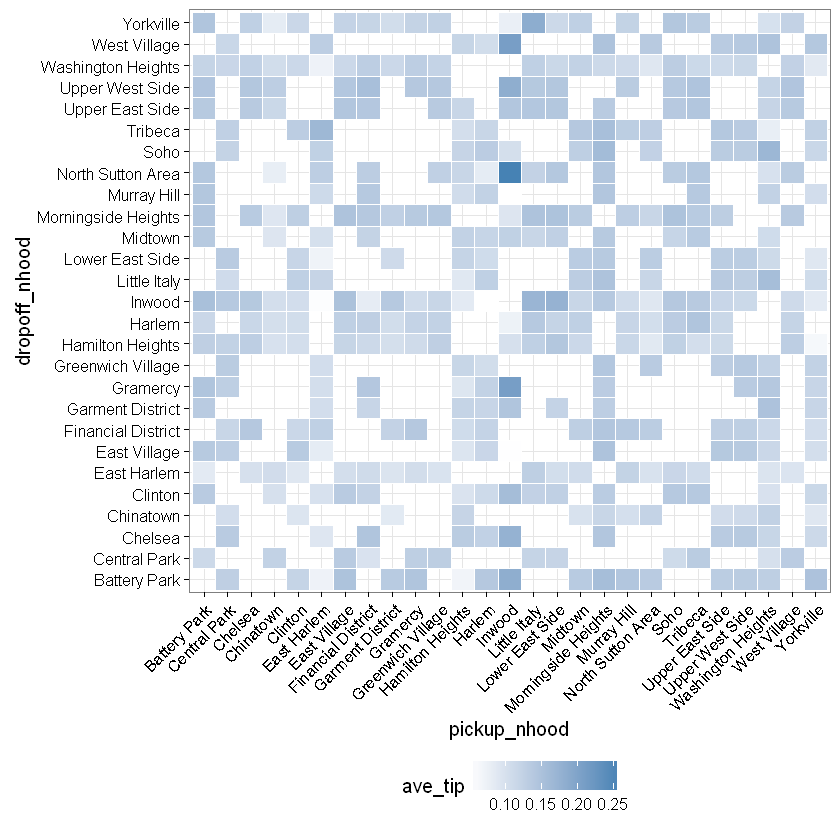

In [23]:
taxi_hood_sum(taxi_df) %>% tile_plot_hood


Let's make that baby interactive.

## Creating Complex Pipelines with do

* The `summarize` function is fun, can summarize many numeric/scalar quantities
* But what if you want multiple values/rows back, not just a scalar summary?
* Meet the `do` verb -- arbitrary `tbl` operations

In [ ]:
taxi_df %>% group_by(dropoff_dow) %>%
  filter(!is.na(dropoff_nhood), !is.na(pickup_nhood)) %>%
  arrange(desc(tip_pct)) %>% 
  do(slice(., 1:2)) %>% 
  select(dropoff_dow, tip_amount, tip_pct, 
         fare_amount, dropoff_nhood, pickup_nhood)


## Estimating Multiple Models with do

* A common use of `do` is to calculate many different models by a grouping variable

In [ ]:
taxi_df %>% sample_n(10^4) %>% 
  group_by(dropoff_dow) %>% 
  do(lm_tip = lm(tip_pct ~ pickup_nhood + passenger_count + pickup_hour,
     data = .))


## Cleaning Output

* By design, every function in `dplyr` returns a `data.frame`
* In the example above, we get back a spooky `data.frame` with a column of `S3` `lm` objects
* You can still modify each element as you would normally, or pass it to a `mutate` function to extract intercept or statistics
* But there's also a very handy `broom` package for cleaning up such objects into `data.frames`

In [ ]:
library(broom)
taxi_df %>% sample_n(10^5) %>%  
  group_by(dropoff_dow) %>% 
  do(glance(lm(tip_pct ~ pickup_nhood + passenger_count + pickup_hour,
     data = .)))



## Summary

mutate

:    Create transformations

summarise

:    Aggregate

group_by

:    Group your dataset by levels

do

:    Evaluate complex operations on a tbl

Chaining with the `%>%` operator can result in more readable code.

## What We Didn't Cover

* There are many additional topics that fit well into the `dplyr` and functional programming landscape
* There are too many to cover in one session. Fortunately, most are well documented. The most notable omissions:
  1. Connecting to remote databases, see `vignette('databases', package = 'dplyr')`
  2. Merging and Joins, see `vignette('two-table', package = 'dplyr')`
  3. Programming with `dplyr`,`vignette('nse', package = 'dplyr')`
  4. `summarize_each` and `mutate_each`

## Thanks for Attending!

- Any questions?
- [alizaidi@microsoft.com](mailto:alizaidi@microsoft.com)